### Choose a dataset that is of interest to you and is well suited for clustering
Dataset: https://archive.ics.uci.edu/ml/datasets/wine

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

# Import preprocessing modules from sklearn
import sklearn.preprocessing as pre
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Import classifiers from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Imoprt cross validation module from sklearn
from sklearn.model_selection import cross_val_score

# Import accuracy calculator from sklearn
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('./wine.data',header=None)
df.columns=['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

### Describe the dataset

In [3]:
df.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
input_df=df.loc[::,'Alcohol':'Proline']
input_df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Perform EDA to understand the variables of the dataset

### Variables
Class Label = Y  
Alcohol  
Malic acid  
Ash  
Alcalinity of ash  
Magnesium  
Total phenols  
Flavanoids  
Nonflavanoid phenols  
Proanthocyanins  
Color intensity  
Hue  
OD280/OD315 of diluted wines  
Proline  

In [5]:
# Drop records with outlier values (over 3stdv from mean)
df.drop(df[(df['Magnesium'] > 143)].index,inplace=True)
df.drop(df[(df['Flavanoids'] > 4)].index,inplace=True)
df.drop(df[(df['Proanthocyanins'] > 3.31)].index,inplace=True)
df.drop(df[(df['Color intensity'] > 12.01)].index,inplace=True)
df.drop(df[(df['Hue'] > 1.6)].index,inplace=True)

<AxesSubplot:ylabel='Frequency'>

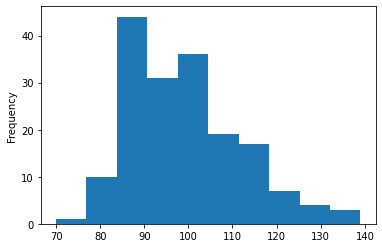

In [6]:
df['Magnesium'].plot.hist()

<AxesSubplot:title={'center':'Proanthocyanins vs Flavanoids'}, xlabel='Proanthocyanins', ylabel='Flavanoids'>

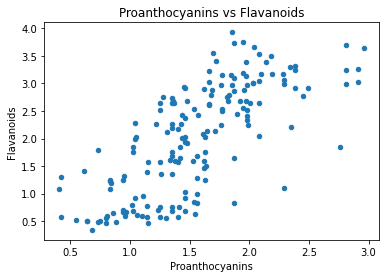

In [7]:
df.plot.scatter(x='Proanthocyanins',
               y='Flavanoids',
               title='Proanthocyanins vs Flavanoids')

<AxesSubplot:title={'center':'Ash vs Class label'}, xlabel='Ash', ylabel='Class label'>

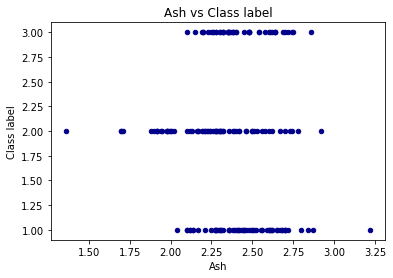

In [8]:
df.plot.scatter(x='Ash',
                y='Class label',
                c='DarkBlue',
                title="Ash vs Class label")

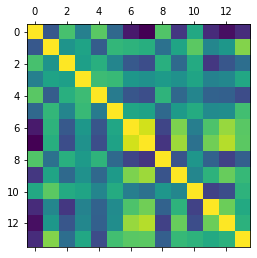

In [9]:
plt.matshow(df.corr())

### Design an experiment using testing and training (holdout method, cross-validation, or bootstrap method). Validate the partition with a statistical test
holdout=70/30 (random partitions)  
cross-validation=partition into k mutually exclusive subsets (k=10 is most popular)  
bootstrap=samples uniformly with replacement (prob not going to do this)  

In [10]:
# Partition dataframe to input and target variables
X, y = df.iloc[:,1:].values, df.iloc[:,0].values

# Split dataset into testing and training using holdout method
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=0)

# MinMax Scale
scaler = MinMaxScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.fit_transform(X_test)

### Research 3 different classification algorithms
kNN, Naive Bayes, Decision Trees

### Explain the algorithms
__kNN:__  
Determine k (benchmark for # of nearest neighbors deemed relevant [usually 10])  
Calculate distance between test value and training values  
Sort values by distance and determine k nearest neighbors  
Gather response variable (Y) for k nearest neighbors  
Use simple majority to assign value to test value  

__Decision Trees:__  
Sorts attributes into tree-like structure  
Each leaf represents a discrete or categorical response variable  
Test data set response variables are calculated by traversing the tree according to the test data values  

__Naive Bayes:__  
Analyzes probability of each outcome for each variable in training data  
Then analyzes probability of each outcome for each variable in training  


### Compare the results of 3 or more classification methods using the same experimental setup using one or more classification evaluation methods discussed in class. The metrics can include accurace, error rate, sensitivity, specificity, preciison, and F measure

#### K Nearest Neighbors Implementation
Will use holdout method 70/30

In [11]:
# Create copy of training and test values for kNN classifier
knn_Xtrain=X_train_norm
knn_ytrain=y_train
knn_Xtest=X_test_norm
knn_ytest=y_test

In [12]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(knn_Xtrain, knn_ytrain)
knn_predict=neigh.predict(knn_Xtest)
dataframe={'Prediction': knn_predict, 'Actual': knn_ytest}
dt_results=pd.DataFrame(data=dataframe)
dt_results.head()

,Prediction,Actual
0,1,1
1,3,3
2,2,2
3,1,1
4,3,3


In [13]:
accuracy_score(knn_ytest, knn_predict)

0.9807692307692307

#### Decision Tree Implementation

In [14]:
# Create copy of training and test values for Decision Tree classifier
dt_Xtrain=X_train_norm
dt_ytrain=y_train
dt_Xtest=X_test_norm
dt_ytest=y_test

In [15]:
# Create Decision Tree Classifier Object
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier = dt_classifier.fit(dt_Xtrain, dt_ytrain)

# Use cross-validation method to train/test decision tree
dt_predict=dt_classifier.predict(dt_Xtest)
dataframe={'Prediction': dt_predict, 'Actual': dt_ytest}
dt_results=pd.DataFrame(data=dataframe)
dt_results.tail()

,Prediction,Actual
47,2,2
48,3,3
49,1,1
50,2,2
51,3,3


In [16]:
accuracy_score(dt_ytest, dt_predict)

0.8653846153846154

#### Naive Bayes Implementation

In [17]:
# Create copy of training and test values for Naive Bayes classifier
nb_Xtrain=X_train
nb_ytrain=y_train
nb_Xtest=X_test
nb_ytest=y_test

In [18]:
gnb = GaussianNB()
nb_predict = gnb.fit(nb_Xtrain, nb_ytrain).predict(nb_Xtest)
dataframe={'Prediction': nb_predict, 'Actual': nb_ytest}
nb_results=pd.DataFrame(data=dataframe)
nb_results.head()

,Prediction,Actual
0,1,1
1,3,3
2,2,2
3,1,1
4,3,3


In [19]:
accuracy_score(nb_ytest, nb_predict)

0.9807692307692307